In [1]:
from psaw import PushshiftAPI
import pandas as pd
from textblob import TextBlob
import matplotlib as plt
import matplotlib.pyplot as plt 

In [2]:
api = PushshiftAPI()

In [ ]:
start_epoch=int(datetime(2019, 1, 1).timestamp())

scraping = pd.DataFrame(api.search_comments(after=start_epoch,
                        subreddit='bitcoin',
                        filter=['body', 'date', 'score']
                        ))
scraping = scraping.drop(['created', 'd_'], axis = 1)

scraping['created_utc'] = pd.to_datetime(scraping['created_utc'],unit='s')
scraping = scraping.sort_values(by='created_utc')

In [ ]:
scraping['TBPolarity'] = pd.Series(dtype='float')
scraping['TBSubjectivity'] = pd.Series(dtype='float')

def textblob_pol(body):
    
    return TextBlob(body).sentiment.polarity

def textblob_sub(body):
    
    return TextBlob(body).sentiment.subjectivity

scraping['TBPolarity'] = scraping['body'].apply(textblob_pol)

scraping['TBSubjectivity'] = scraping['body'].apply(textblob_sub)

In [ ]:
scraping.to_pickle('dados_bitcoin')

In [5]:
base = pd.read_pickle('dados_bitcoin')

In [8]:
base['score']=base['score'].abs()
base['dia'] = base['created_utc'].dt.date

In [9]:
base['weight'] = base['score']/base.groupby('dia')['score'].transform('sum')

In [10]:
base['value']=base['TBPolarity']*base['weight']

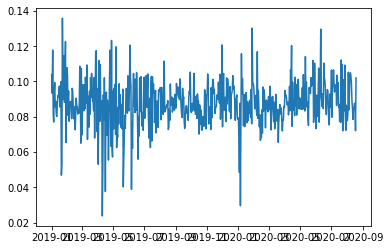

In [11]:
plt.plot(base.set_index('created_utc').groupby(pd.Grouper(freq='D')).sum()['value'])